# Image segmentation using OpenCV

In [110]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os

## Tutorial
https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

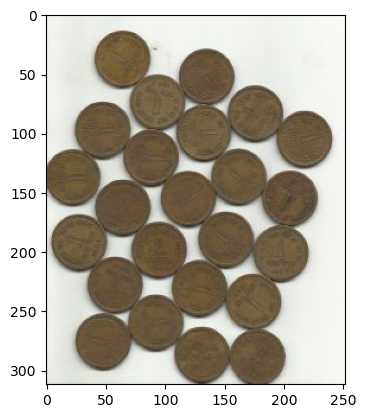

In [111]:
img = cv.imread('coins.jpg')

image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB) 

plt.imshow(image_rgb)
plt.show()

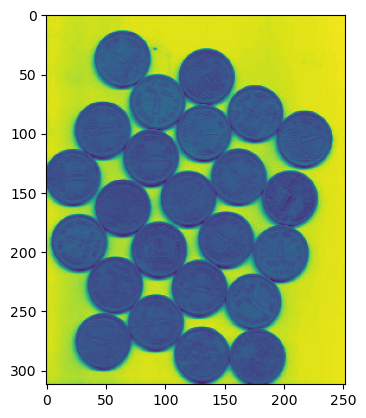

In [112]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(gray)
plt.show()

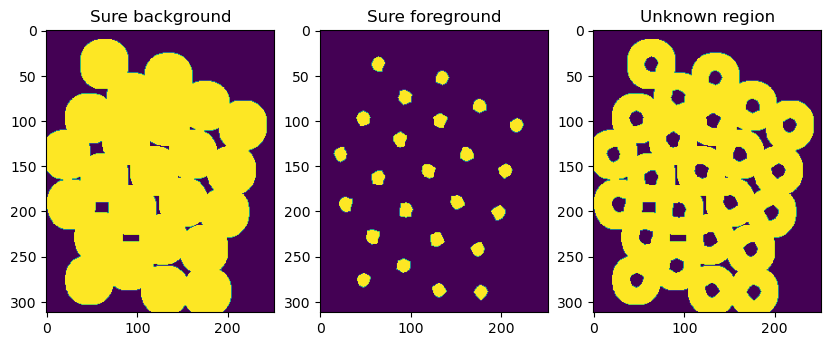

In [113]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# Plot results

fig, axarr = plt.subplots(1,3, figsize=(10, 8))
axarr[0].imshow(sure_bg)
axarr[0].set_title("Sure background")
axarr[1].imshow(sure_fg)
axarr[1].set_title("Sure foreground")
axarr[2].imshow(unknown)
axarr[2].set_title("Unknown region")

plt.show()

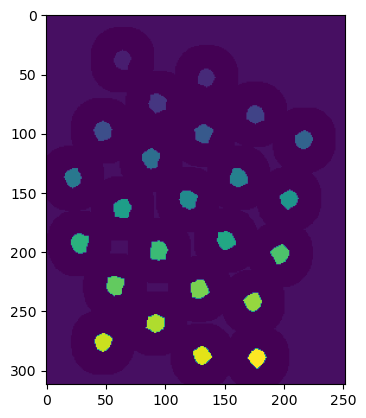

In [114]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers)
plt.show()

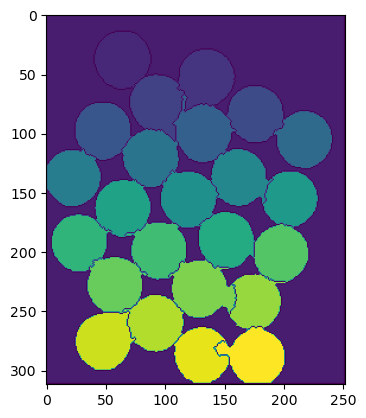

In [115]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(markers)
plt.show()

## Load image from dataset

In [116]:
def video_to_frames(video, path_output_dir):
    # extract frames from a video and save to directory as 'x.png' where 
    # x is the frame index
    vidcap = cv.VideoCapture(video)
    count = 0
    while vidcap.isOpened():
        success, image = vidcap.read()
        if success:
            cv.imwrite(os.path.join(path_output_dir, '%d.png') % count, image)
            count += 1
        # Grab one image
        if count > 0:
            break
        else:
            break
    cv.destroyAllWindows()
    vidcap.release()

# Predict a specified video from a directory

specified_vid = "7393438831816789137_r1.mp4"

video_to_frames(f'./{specified_vid}', './frames')

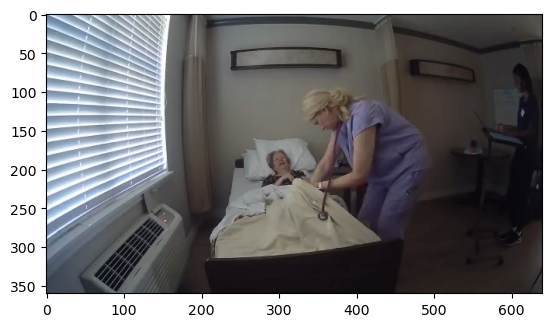

In [117]:
new_img = cv.imread('./frames/0.png')
new_image_rgb = cv.cvtColor(new_img, cv.COLOR_BGR2RGB) 

plt.imshow(new_image_rgb)
plt.show()

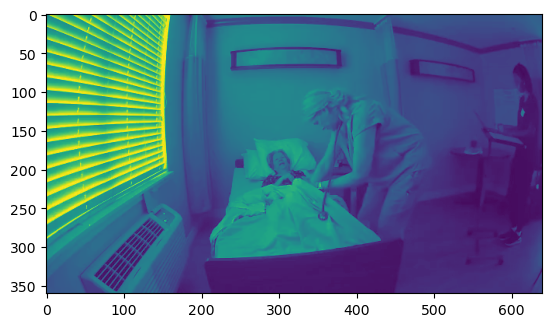

In [118]:
gray = cv.cvtColor(new_img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(gray)
plt.show()

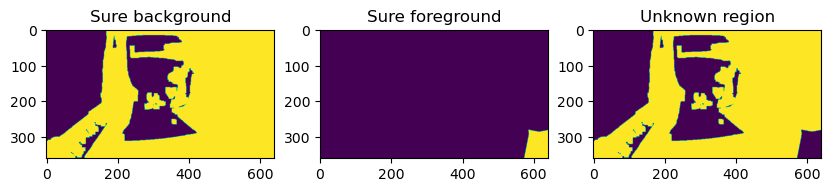

In [119]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# Plot results

fig, axarr = plt.subplots(1,3, figsize=(10, 8))
axarr[0].imshow(sure_bg)
axarr[0].set_title("Sure background")
axarr[1].imshow(sure_fg)
axarr[1].set_title("Sure foreground")
axarr[2].imshow(unknown)
axarr[2].set_title("Unknown region")

plt.show()

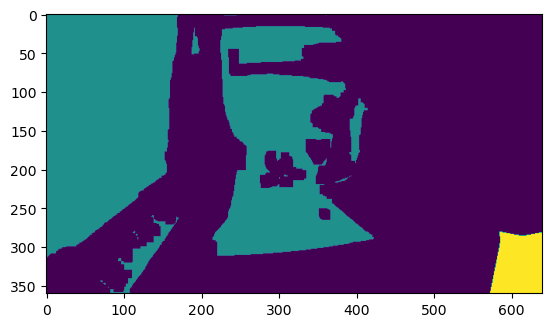

In [120]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers)
plt.show()

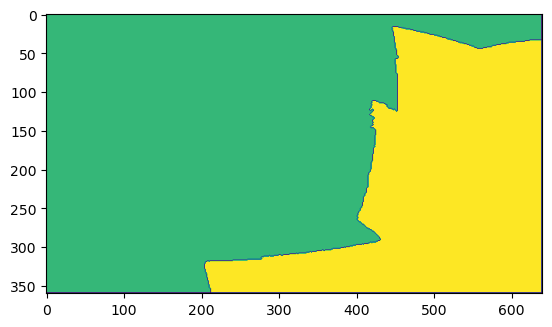

In [122]:
markers = cv.watershed(new_img, markers)
new_img[markers == -1] = [255,0,0]

plt.imshow(markers)
plt.show()